In [96]:
import numpy as np
import pandas as pd
import os
from timeit import default_timer as timer

base="../../data/clean/"
pd.set_option('display.max_rows', 150)

In [121]:
targets = pd.read_csv(base+"filtered_nonlog_target.csv").iloc[:,1:]
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [98]:
crimes = targets.columns[1:]
crimes

Index(['Assault - domestic violence', 'Assault - non-domestic violence',
       'Fraud', 'Sexual Offences', 'Malicious damage to property',
       'Prohibited weapons offences'],
      dtype='object')

In [99]:
tfidf_preds=pd.read_csv(os.path.join(base, 'tfidf_by_lga_and_time_of_day_2016_rfr_preds.csv'))
tfidf_preds

,LGA,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
0,Albury,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
1,Armidale Regional,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
2,Ballina,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
3,Bathurst Regional,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
4,Bayside,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
5,Bega Valley,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
6,Bellingen,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
7,Berrigan,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
8,Blacktown,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
9,Bland,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [100]:
opal_preds = pd.read_csv(os.path.join(base, 'opal_predictions.csv'))
opal_preds = targets[['LGA']].merge(opal_preds,left_on='LGA',right_on='lga',how='left')
opal_cols = opal_preds.columns[-6:].tolist()
new_cols = ['Opal ' + name[:-6] for name in opal_cols]
opal_preds = opal_preds[['LGA']+opal_cols]
opal_preds.columns = ['LGA'] + new_cols
opal_preds = opal_preds.fillna(opal_preds.median())
opal_preds

,LGA,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [101]:
derived = pd.read_csv(os.path.join(base, 'twitter_17_features.csv'))
derived = derived.rename(columns={'lga': 'LGA'})
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,Morning_pcapita,Afternoon_pcapita,Evening_pcapita,Prof_exists_pcapita,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters
0,Woollahra,0.000000,0.001180,348,0.621871,-0.023966,-0.033575,-0.026190,-0.033724,0.017662,0.024631,0.015431,0.012242,0.000922,1,0,2,3
1,Camden,0.376190,0.000575,210,0.861029,-0.029580,-0.026253,-0.025182,-0.014432,0.005127,0.006968,0.002007,0.003286,0.000102,0,2,0,1
2,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,0.152263,0.045873,0.083836,0.024101,4,3,26,29
3,North Sydney,0.021667,0.002468,600,0.271039,-0.052205,-0.045564,-0.046517,-0.049899,0.032162,0.064102,0.004818,0.021505,0.003326,1,3,11,13
4,Central Coast,0.423130,0.004034,3597,0.415482,-0.046644,-0.041427,-0.038655,-0.047701,0.063624,0.091702,0.030927,0.045790,0.007695,25,13,89,129
5,Fairfield,0.108527,0.000121,129,0.685430,-0.084061,-0.022593,-0.026363,-0.031932,0.000679,0.000503,0.000070,0.000267,0.000030,1,0,1,0
6,Temora,0.239130,0.002946,46,0.714286,-0.035714,-0.046078,-0.021142,-0.035563,0.008347,0.008183,0.001146,0.002946,0.000000,0,0,1,0
7,Cobar,0.354167,0.002798,48,0.779412,-0.033369,-0.005390,-0.032429,-0.032567,0.018076,0.035076,0.016785,0.017861,0.000646,0,0,2,0
8,Lithgow,0.599415,0.003035,342,0.577253,-0.120640,-0.044516,-0.051436,-0.044959,0.080322,0.083784,0.025699,0.036984,0.011996,2,1,5,7
9,Glen Innes Severn,0.477612,0.001245,67,0.554392,-0.029056,-0.023926,-0.015134,-0.053456,0.065980,0.082390,0.019466,0.026709,0.003508,1,0,1,2


In [102]:
derived_features = derived.columns[1:]
derived = derived.merge(tfidf_preds, on='LGA')
derived = derived.sort_values(by=['LGA'])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
2,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,...,4,3,26,29,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
108,Armidale Regional,0.375817,0.003362,306,0.514424,-0.055108,-0.031328,-0.032230,-0.052526,0.062039,...,0,1,5,5,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
99,Ballina,0.594556,0.003853,698,0.550613,-0.044911,-0.028317,-0.028855,-0.034108,0.040608,...,0,4,10,10,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
56,Bathurst Regional,0.476974,0.004383,608,0.444390,-0.052977,-0.050872,-0.047609,-0.068169,0.047240,...,0,1,4,7,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
85,Bayside,0.042857,0.001538,770,0.265229,-0.075598,-0.050517,-0.046830,-0.050722,0.009817,...,1,6,10,14,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
93,Bega Valley,0.482255,0.004511,479,0.607501,-0.034405,-0.029967,-0.037206,-0.039107,0.046492,...,1,0,18,19,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
44,Bellingen,0.556122,0.003237,196,0.838773,-0.021720,-0.020343,-0.030741,-0.027155,0.040654,...,0,1,3,7,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
55,Berrigan,0.362745,0.003663,102,0.349639,-0.038052,-0.046724,-0.028920,-0.048967,0.047034,...,1,0,5,2,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
100,Blacktown,0.060345,0.000258,348,0.380935,-0.039068,-0.023631,-0.030796,-0.046748,0.002181,...,2,1,7,9,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
42,Bland,0.258065,0.001511,31,0.812766,-0.102734,-0.096352,-0.105637,-0.107463,0.013266,...,0,0,0,0,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [103]:
derived = derived.merge(opal_preds, on='LGA')
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,...,584.012860,196.170292,1124.752268,231.835807,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,0.375817,0.003362,306,0.514424,-0.055108,-0.031328,-0.032230,-0.052526,0.062039,...,425.435200,196.414083,1003.058845,231.269322,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,0.594556,0.003853,698,0.550613,-0.044911,-0.028317,-0.028855,-0.034108,0.040608,...,576.674090,220.255568,1032.020485,239.359978,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,0.476974,0.004383,608,0.444390,-0.052977,-0.050872,-0.047609,-0.068169,0.047240,...,522.160865,229.290217,1013.712130,251.559590,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,0.042857,0.001538,770,0.265229,-0.075598,-0.050517,-0.046830,-0.050722,0.009817,...,592.332382,106.876427,540.547368,109.994835,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,0.482255,0.004511,479,0.607501,-0.034405,-0.029967,-0.037206,-0.039107,0.046492,...,465.062662,203.617620,1033.803275,219.865595,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,0.556122,0.003237,196,0.838773,-0.021720,-0.020343,-0.030741,-0.027155,0.040654,...,346.964275,225.030533,879.991630,308.142215,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,0.362745,0.003663,102,0.349639,-0.038052,-0.046724,-0.028920,-0.048967,0.047034,...,401.050937,211.007365,971.784085,316.459325,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,0.060345,0.000258,348,0.380935,-0.039068,-0.023631,-0.030796,-0.046748,0.002181,...,504.609503,144.208582,695.388555,154.947338,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,0.258065,0.001511,31,0.812766,-0.102734,-0.096352,-0.105637,-0.107463,0.013266,...,259.077642,208.489933,989.414680,337.289963,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

all_features = pd.read_csv(os.path.join(base, 'baseline_12_features.csv'))
all_features = all_features.rename(columns={'lga': 'LGA'})
demog_features = all_features.columns[0:-1]
print(demog_features)
all_features = derived.merge(all_features, on='LGA')
all_features = all_features.sort_values(by=['LGA'])
# SCALE:
all_features[all_features.columns[1:]] = scaler.fit_transform(all_features[all_features.columns[1:]])
print(all_features.columns)
all_features

Index(['Percent_Unem_loyment_P_G40', 'Median_age_persons_G02',
       'Median_mortgage_repay_monthly_G02', 'Median_rent_weekly_G02',
       'Median_tot_hhd_inc_weekly_G02', 'Per_lone_par', 'Num_sep_males',
       'Pop_density', 'Per_no_relg', 'Per_immi', 'Per_english', 'Per_Voc'],
      dtype='object')
Index(['LGA', 'instagrammers_ratio', 'replyers_per_capita', 'total_tweeters',
       'link_tweets_ratio', 'Polr_Neg_A_ptweet', 'Polr_Neg_N_ptweet',
       'Polr_Neg_E_ptweet', 'Polr_Neg_M_ptweet', 'Night_pcapita',
       'Morning_pcapita', 'Afternoon_pcapita', 'Evening_pcapita',
       'Prof_exists_pcapita', 'tr_tweeters', 'ja_tweeters', 'in_tweeters',
       'tl_tweeters', 'TF-IDF Assault - domestic violence',
       'TF-IDF Assault - non-domestic violence', 'TF-IDF Fraud',
       'TF-IDF Sexual Offences', 'TF-IDF Malicious damage to property',
       'TF-IDF Prohibited weapons offences',
       'Opal Assault - domestic violence',
       'Opal Assault - non-domestic violence', 'Opal Fra

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,Median_mortgage_repay_monthly_G02,Median_rent_weekly_G02,Median_tot_hhd_inc_weekly_G02,Per_lone_par,Num_sep_males,Pop_density,Per_no_relg,Per_immi,Per_english,Per_Voc
0,Albury,0.466554,0.416775,0.197563,0.287275,0.729411,0.547625,0.714284,0.712753,0.462604,...,0.273878,0.209434,0.217708,0.553845,0.545986,0.021413,0.455354,0.169855,0.910412,0.882425
1,Armidale Regional,0.516683,0.218445,0.075966,0.502525,0.743688,0.767746,0.827506,0.715377,0.222867,...,0.262449,0.245283,0.211458,0.558697,0.397525,0.000425,0.453453,0.205078,0.885233,0.386698
2,Ballina,0.817410,0.251528,0.177599,0.541787,0.791112,0.793016,0.845567,0.815179,0.145025,...,0.401224,0.415094,0.202604,0.560206,0.491028,0.011047,0.535251,0.094077,0.949884,0.657809
3,Bathurst Regional,0.655755,0.287248,0.154265,0.426547,0.753595,0.603735,0.745196,0.630611,0.169113,...,0.375510,0.301887,0.282812,0.566640,0.491999,0.001375,0.311942,0.067908,0.918670,0.596823
4,Bayside,0.058921,0.095517,0.196267,0.232176,0.648384,0.606711,0.749366,0.725153,0.033190,...,0.673469,0.641509,0.447396,0.405617,0.365273,0.401445,0.258616,0.691874,0.240357,0.736324
5,Bega Valley,0.663016,0.295896,0.120819,0.603503,0.839979,0.779166,0.800873,0.788092,0.166398,...,0.242041,0.245283,0.114063,0.426294,0.667893,0.000667,0.671224,0.106005,0.956698,0.441845
6,Bellingen,0.764571,0.210004,0.047446,0.854408,0.898977,0.859929,0.835475,0.852856,0.145192,...,0.265306,0.301887,0.119792,0.720020,0.652684,0.001003,0.798436,0.118716,0.969164,0.567172
7,Berrigan,0.498711,0.238779,0.023075,0.323752,0.823015,0.638543,0.845221,0.734662,0.168365,...,0.135918,0.113208,0.104167,0.319967,0.616265,0.000513,0.324782,0.060599,0.922197,0.346292
8,Blacktown,0.082964,0.009266,0.086855,0.357704,0.818289,0.832335,0.835178,0.746689,0.005456,...,0.571429,0.490566,0.491667,0.567573,0.435003,0.180144,0.104001,0.481686,0.426974,0.598399
9,Bland,0.354794,0.093728,0.004667,0.826193,0.522169,0.222073,0.434630,0.417689,0.045718,...,0.102041,0.056604,0.173437,0.439125,0.593415,0.000076,0.072331,0.043375,0.901472,0.288869


In [133]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe of input variables
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def rfr_cv(X, y, folds=5, verbose=False, random_state=2018):
    assert len(X) == len(y)

    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()

        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_df, y_train_df.iloc[:,-1])

        # Save important features
        importances = model.feature_importances_
        for i in range(len(importances)):
            importants[X_train_df.columns[i]] += importances[i] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test_df)
        preds = pd.concat([preds,y_test_df])

        if verbose:
            print('Finished processing',len(preds),'records...')
    preds = preds.sort_values(by=[preds.columns[0]]).reset_index(drop=True)
    return preds, importants

In [148]:
def repeat_rfr_cv(X, y, reps=10, folds=10, random_state=2018):
    np.random.seed(random_state)
    all_preds = pd.DataFrame()
    all_importants = defaultdict(float)
    for rep in np.arange(reps):
        preds, importants = rfr_cv(X, y, folds=folds, random_state=None)
        for (k,v) in importants.items():
            all_importants[k] += v / reps
        all_preds = all_preds.append(preds)
    all_preds = all_preds.groupby("LGA").mean().reset_index()
    return all_preds, all_importants

In [ ]:
targets

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()


In [13]:
# Generates mean MAPE and std deviation across 6 crime types
def mmape_score(X, y, features, folds=10, n=4):
    mmapes = np.zeros(n)
    for i in np.arange(n):
        mmape = 0
        for crime in crimes:
            X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
            X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
            preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
            mmape += mape(preds.iloc[:,-2], preds.iloc[:,-1])
        mmapes[i] = mmape / len(crimes)
    return np.mean(mmapes), np.std(mmapes)

In [162]:
# Generates mean MAPE and std deviation for one crime type
def score_crime(X, y, features, crime, n=10, folds=10, random_state=2018):
    np.random.seed(random_state)
    mapes = np.zeros(n)
    for i in np.arange(n):
        X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
        X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
        preds, _ = repeat_rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, reps=10, random_state=None)
        mapes[i] = mape(preds.iloc[:,-2], preds.iloc[:,-1])
    return mapes

In [71]:
from scipy.stats import t

def crime_ci(crime, sample1, sample2):
    assert len(sample1) == len(sample2)
    
    tstat,p = stats.ttest_ind(sample1, sample2)

    # Calculate the 95% confidence interval
    N1 = len(sample1)
    N2 = len(sample2)
    df = (N1 + N2 - 2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
    moe = t.ppf(0.975, df) * std_N1N2 * np.sqrt(1/N1 + 1/N2)

    return tstat, p, moe

Assault - domestic violence
Finished 10x10 fold cross validation in 1.5218102540820837 seconds
MOST IMPORTANT FEATURES:
Polr_Neg_N_ptweet 0.139653399279
instagrammers_ratio 0.119213647237
total_tweeters 0.0883445424666
replyers_per_capita 0.0834850752549
Morning_pcapita 0.0718285216665
tl_tweeters 0.0690217484193
Polr_Neg_M_ptweet 0.0588301806082
Prof_exists_pcapita 0.0526705078307
Polr_Neg_E_ptweet 0.0493637233108
Afternoon_pcapita 0.0485691926774
Night_pcapita 0.0471472766394
Evening_pcapita 0.0461346154939
link_tweets_ratio 0.0437724906252
Polr_Neg_A_ptweet 0.0427459688476
in_tweeters 0.0241002266781
tr_tweeters 0.00766252839753
ja_tweeters 0.00745635456833
R2: 0.163528737273
RMSE: 268.230763918
MAPE: 63.6471421798
Mean APE Baseline: 72.0914035637


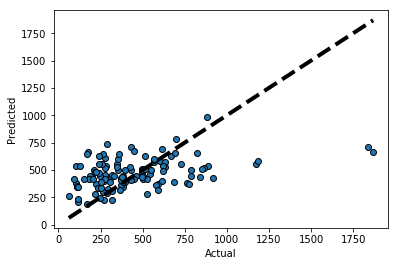

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.6053690072149038 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.126941593969
Morning_pcapita 0.114758504043
instagrammers_ratio 0.0910240460885
Afternoon_pcapita 0.085524021028
replyers_per_capita 0.0667439123099
Evening_pcapita 0.0657430644548
Night_pcapita 0.0618101977569
Polr_Neg_N_ptweet 0.0613294740801
ja_tweeters 0.0541347253625
link_tweets_ratio 0.0490645323027
tl_tweeters 0.0413633879718
Polr_Neg_M_ptweet 0.0407396669989
in_tweeters 0.0382419975618
Polr_Neg_E_ptweet 0.0338821846887
Prof_exists_pcapita 0.0311566055425
Polr_Neg_A_ptweet 0.028850868567
tr_tweeters 0.00869121727349
R2: 0.0824906562107
RMSE: 232.862612461
MAPE: 53.8952444147
Mean APE Baseline: 59.8326771602


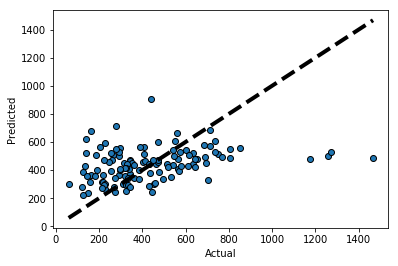

Fraud
Finished 10x10 fold cross validation in 1.743021628819406 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.220085676559
total_tweeters 0.209625186942
instagrammers_ratio 0.168514925654
replyers_per_capita 0.0481979696093
Polr_Neg_E_ptweet 0.0476925757539
tl_tweeters 0.0427908332168
tr_tweeters 0.0403748074725
link_tweets_ratio 0.0374149452737
Polr_Neg_A_ptweet 0.0327650103541
in_tweeters 0.0234423911961
Polr_Neg_M_ptweet 0.0233380716456
Afternoon_pcapita 0.0209580336523
Polr_Neg_N_ptweet 0.0207571213461
Prof_exists_pcapita 0.0187545088609
Morning_pcapita 0.0187269840355
Evening_pcapita 0.0134731006926
Night_pcapita 0.0130878577353
R2: 0.253923106864
RMSE: 249.802192418
MAPE: 36.9608084661
Mean APE Baseline: 50.564378615


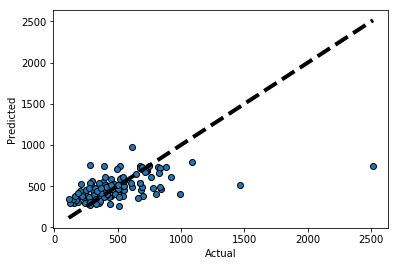

Sexual Offences
Finished 10x10 fold cross validation in 1.6618557879701257 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.206417089254
replyers_per_capita 0.124037495117
Night_pcapita 0.08921717039
total_tweeters 0.0737947871478
Polr_Neg_N_ptweet 0.0641512180814
Polr_Neg_E_ptweet 0.0555499204864
link_tweets_ratio 0.050412599613
Evening_pcapita 0.0478442751759
Prof_exists_pcapita 0.0469360137776
Morning_pcapita 0.0467259219668
Polr_Neg_M_ptweet 0.0423841670522
Afternoon_pcapita 0.0422708555988
Polr_Neg_A_ptweet 0.0397469609856
tl_tweeters 0.0270007103096
in_tweeters 0.0187253485717
ja_tweeters 0.0124842679432
tr_tweeters 0.0123011985287
R2: 0.298659926223
RMSE: 78.17797382
MAPE: 39.4952284239
Mean APE Baseline: 53.0821806583


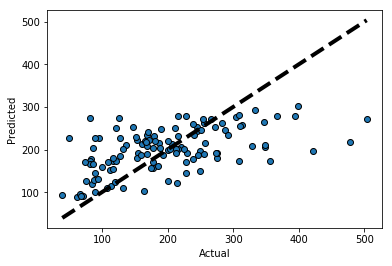

Malicious damage to property
Finished 10x10 fold cross validation in 1.7614500117488205 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.174345086067
Morning_pcapita 0.110781173652
Polr_Neg_N_ptweet 0.109312926345
replyers_per_capita 0.0799382916631
Night_pcapita 0.0696724597825
Afternoon_pcapita 0.057257705379
Evening_pcapita 0.056195621671
tl_tweeters 0.0524421063066
total_tweeters 0.0516177206197
Polr_Neg_M_ptweet 0.0485653998674
link_tweets_ratio 0.0451891323398
Polr_Neg_E_ptweet 0.041250118862
Prof_exists_pcapita 0.0373884573395
Polr_Neg_A_ptweet 0.0302294000125
in_tweeters 0.0207313567866
ja_tweeters 0.00768110843826
tr_tweeters 0.00740193486889
R2: 0.226820101925
RMSE: 503.725916907
MAPE: 44.8529113996
Mean APE Baseline: 53.4238936165


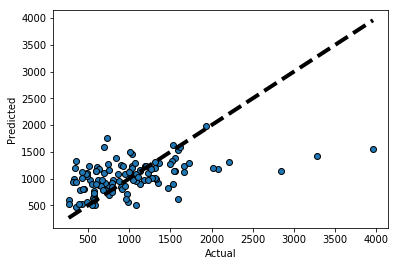

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.8068514820188284 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.238330723341
instagrammers_ratio 0.180253825048
replyers_per_capita 0.14618333328
tl_tweeters 0.0605535480431
Polr_Neg_A_ptweet 0.0470792506019
Polr_Neg_N_ptweet 0.0384892624615
Afternoon_pcapita 0.0380862871009
Prof_exists_pcapita 0.037193524716
Polr_Neg_M_ptweet 0.0342030071006
Night_pcapita 0.0333633554042
Polr_Neg_E_ptweet 0.0305070747016
link_tweets_ratio 0.0304317331903
ja_tweeters 0.0202273549257
Evening_pcapita 0.0198236719104
Morning_pcapita 0.019816882234
in_tweeters 0.0178671154908
tr_tweeters 0.00759005044951
R2: 0.401131775255
RMSE: 115.432839444
MAPE: 85.2640466613
Mean APE Baseline: 126.659859832


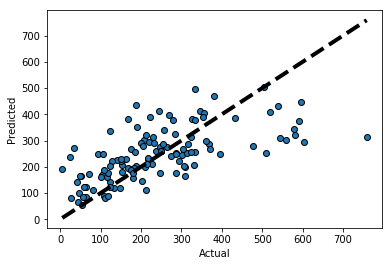

,LGA,DERIVED Assault - domestic violence,DERIVED Assault - non-domestic violence,DERIVED Fraud,DERIVED Sexual Offences,DERIVED Malicious damage to property,DERIVED Prohibited weapons offences
0,Albury,460.492151,479.687299,597.126277,232.736361,1198.431476,287.769059
1,Armidale Regional,420.357968,480.609739,470.905714,207.087775,1303.460314,254.049982
2,Ballina,333.636394,355.749432,423.237205,191.491919,783.486398,178.931007
3,Bathurst Regional,418.572858,445.896215,450.091941,199.589092,983.868232,209.911832
4,Bayside,229.092626,247.917806,683.055424,119.045626,501.887807,86.871954
5,Bega Valley,438.566572,473.258632,434.821585,222.484672,950.535577,206.483913
6,Bellingen,613.240748,505.137153,457.778466,172.920312,1215.537922,248.478014
7,Berrigan,659.976635,623.508895,373.309029,274.844264,1583.837133,376.958482
8,Blacktown,374.281366,299.946046,730.761094,101.647632,563.379673,120.819112
9,Bland,553.283858,447.203040,294.264000,278.907077,1266.084595,469.365100


In [155]:
output = pd.DataFrame()
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist()
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'DERIVED '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [156]:
output.to_csv("../../data/clean/17_derived_features_rfr_preds.csv",index=False)

In [163]:
# Keep a dataframe of mapes scores for each named "model"
mapes_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    mapes_df[crime] = score_crime(all_features, targets, derived_features.tolist(), crime, n=10, random_state=None)
mapes_df['Model'] = 'Twitter 17'
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.5120926066301763 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - domestic violence 0.189573739539
Polr_Neg_N_ptweet 0.123082148512
instagrammers_ratio 0.0837702448096
replyers_per_capita 0.0666706244804
total_tweeters 0.0601150697046
Polr_Neg_M_ptweet 0.0543379761962
Polr_Neg_E_ptweet 0.052775757354
tl_tweeters 0.0516515809442
Morning_pcapita 0.0512723686844
link_tweets_ratio 0.0439024256024
Prof_exists_pcapita 0.0426413826635
Afternoon_pcapita 0.037306805387
Polr_Neg_A_ptweet 0.037111145796
Night_pcapita 0.0368033616428
Evening_pcapita 0.0322616706956
in_tweeters 0.0218221659882
ja_tweeters 0.00872723769759
tr_tweeters 0.00617429430232
R2: 0.165163732942
RMSE: 267.968489127
MAPE: 62.2624054653
Mean APE Baseline: 72.0914035637


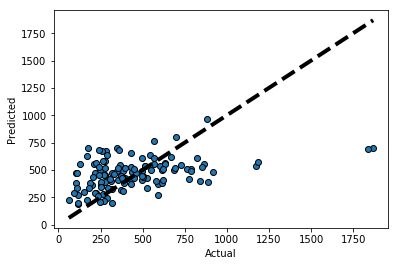

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.5209242920391262 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.123078871253
TF-IDF Assault - non-domestic violence 0.110953531885
Morning_pcapita 0.0892124998425
instagrammers_ratio 0.0872199549452
Afternoon_pcapita 0.0682633118544
Polr_Neg_N_ptweet 0.0588040919776
replyers_per_capita 0.0538246128615
Evening_pcapita 0.0530087697817
ja_tweeters 0.0508492091118
Night_pcapita 0.0506165730125
link_tweets_ratio 0.0420080158315
Polr_Neg_M_ptweet 0.0406847892263
in_tweeters 0.0372516454801
tl_tweeters 0.0369692346489
Polr_Neg_E_ptweet 0.0344600430914
Prof_exists_pcapita 0.0304115939809
Polr_Neg_A_ptweet 0.0235197546513
tr_tweeters 0.00886349656452
R2: 0.108251389363
RMSE: 229.570319301
MAPE: 51.3094383475
Mean APE Baseline: 59.8326771602


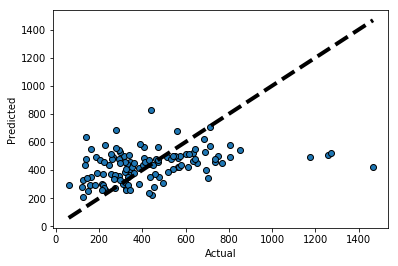

Fraud
Finished 10x10 fold cross validation in 1.5556715852580965 seconds
MOST IMPORTANT FEATURES:
TF-IDF Fraud 0.183589886968
instagrammers_ratio 0.162595397858
total_tweeters 0.152182196247
ja_tweeters 0.132157564964
Polr_Neg_E_ptweet 0.0462372257816
replyers_per_capita 0.0439894212659
tr_tweeters 0.0393985606453
tl_tweeters 0.0391060999652
link_tweets_ratio 0.0334007075468
Polr_Neg_A_ptweet 0.0277161944524
Polr_Neg_M_ptweet 0.021999513186
Afternoon_pcapita 0.0198784417037
Prof_exists_pcapita 0.0192143786664
in_tweeters 0.0190096014383
Polr_Neg_N_ptweet 0.0186454112128
Morning_pcapita 0.0156565478899
Night_pcapita 0.0127179026881
Evening_pcapita 0.0125049475199
R2: 0.247560283013
RMSE: 250.865134379
MAPE: 37.1686709447
Mean APE Baseline: 50.564378615


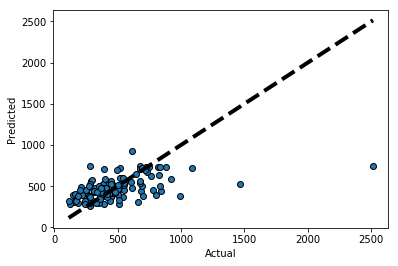

Sexual Offences
Finished 10x10 fold cross validation in 1.5225105178542435 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.223390692014
replyers_per_capita 0.10737267911
instagrammers_ratio 0.100094176383
Night_pcapita 0.0702756189297
Polr_Neg_E_ptweet 0.0579977365267
Polr_Neg_N_ptweet 0.0571534039211
total_tweeters 0.0525795578045
Polr_Neg_M_ptweet 0.0462594064604
Prof_exists_pcapita 0.0417017065251
link_tweets_ratio 0.0404740428568
Evening_pcapita 0.0404563067026
Polr_Neg_A_ptweet 0.0360444337887
Morning_pcapita 0.0346386765213
Afternoon_pcapita 0.0305456071118
tl_tweeters 0.0217480305072
in_tweeters 0.0162138581157
tr_tweeters 0.0122907352509
ja_tweeters 0.0107633314706
R2: 0.310857903436
RMSE: 77.4951410292
MAPE: 37.7012595825
Mean APE Baseline: 53.0821806583


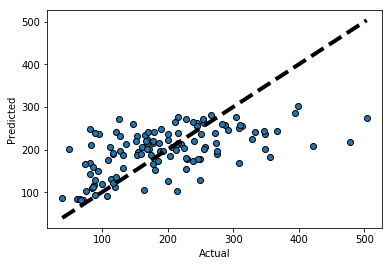

Malicious damage to property
Finished 10x10 fold cross validation in 1.5397207359783351 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.160225226865
TF-IDF Malicious damage to property 0.10914838671
Polr_Neg_N_ptweet 0.107449372369
Morning_pcapita 0.0894556011748
replyers_per_capita 0.066476268938
Night_pcapita 0.0554473956941
Afternoon_pcapita 0.0519248716649
Evening_pcapita 0.0484253720328
tl_tweeters 0.0469399089001
Polr_Neg_M_ptweet 0.0464737004587
total_tweeters 0.0437528260305
link_tweets_ratio 0.0397357743062
Polr_Neg_E_ptweet 0.0366789736338
Prof_exists_pcapita 0.0344343040459
Polr_Neg_A_ptweet 0.0285266324659
in_tweeters 0.0201604483857
ja_tweeters 0.00754190869843
tr_tweeters 0.00720302762601
R2: 0.217054614474
RMSE: 506.89703785
MAPE: 44.5431883333
Mean APE Baseline: 53.4238936165


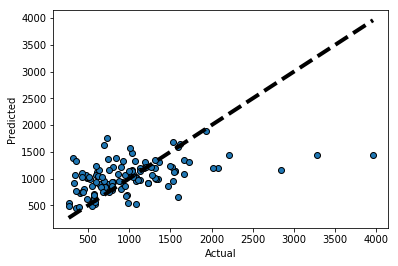

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.4754034113138914 seconds
MOST IMPORTANT FEATURES:
TF-IDF Prohibited weapons offences 0.232757024771
total_tweeters 0.183139645836
instagrammers_ratio 0.0965322864415
replyers_per_capita 0.0917597171346
tl_tweeters 0.0634685294665
Polr_Neg_A_ptweet 0.0411978923001
Polr_Neg_N_ptweet 0.0374028769605
Afternoon_pcapita 0.0329717788511
Night_pcapita 0.0316704651923
Prof_exists_pcapita 0.0304980562375
Polr_Neg_E_ptweet 0.0295971066228
Polr_Neg_M_ptweet 0.0280545469679
link_tweets_ratio 0.0271059544229
Evening_pcapita 0.0225611333561
Morning_pcapita 0.0180199614671
ja_tweeters 0.0133097595553
in_tweeters 0.0129229044105
tr_tweeters 0.00703036000676
R2: 0.40341912916
RMSE: 115.212182924
MAPE: 80.728728675
Mean APE Baseline: 126.659859832


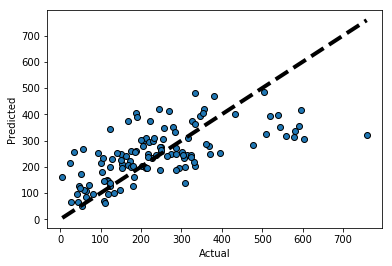

,LGA,Twitter17+TFIDF Assault - domestic violence,Twitter17+TFIDF Assault - non-domestic violence,Twitter17+TFIDF Fraud,Twitter17+TFIDF Sexual Offences,Twitter17+TFIDF Malicious damage to property,Twitter17+TFIDF Prohibited weapons offences
0,Albury,638.928389,489.571766,601.000446,238.640158,1192.818749,311.032694
1,Armidale Regional,441.621854,449.752552,438.425896,212.621638,1443.232475,273.235484
2,Ballina,365.694754,389.547142,443.533923,194.574252,793.826192,210.820301
3,Bathurst Regional,485.266374,481.270705,447.002727,221.928805,1199.796261,232.183679
4,Bayside,196.106432,271.921558,669.666164,108.697192,519.831800,69.064699
5,Bega Valley,403.012534,460.444876,433.221145,231.405270,946.526883,195.563234
6,Bellingen,578.931077,496.587705,458.316343,189.755249,1119.121235,253.509727
7,Berrigan,698.471316,638.635697,366.839096,248.066619,1626.104315,352.190177
8,Blacktown,368.797887,278.864080,732.910419,104.036776,547.319638,112.841930
9,Bland,697.501410,499.063952,275.418037,276.980676,1368.509717,468.897715


In [164]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Twitter17+TFIDF '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [165]:
output.to_csv("../../data/clean/ensemble_twitter17_tfidf_rfr_preds.csv",index=False)

In [166]:
# Append to mapes_df:
t18_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    t18_df[crime] = score_crime(all_features, targets, derived_features.tolist()+['TF-IDF'], crime,
                                n=10, random_state=None)
t18_df['Model'] = 'T17 + TF-IDF'
mapes_df=mapes_df.append(t18_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.5424074488691986 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - domestic violence 0.18049062022
Polr_Neg_N_ptweet 0.125682966505
instagrammers_ratio 0.0814365130948
total_tweeters 0.0618998462987
replyers_per_capita 0.0587950034736
Polr_Neg_M_ptweet 0.0564649170824
Polr_Neg_E_ptweet 0.0523001612958
Morning_pcapita 0.0505174665047
tl_tweeters 0.0500090546039
link_tweets_ratio 0.0420924749041
Prof_exists_pcapita 0.0419663176047
Polr_Neg_A_ptweet 0.0360683249315
Afternoon_pcapita 0.0360366917606
Night_pcapita 0.0328488595907
Evening_pcapita 0.0319923380814
Opal Assault - domestic violence 0.0262839877628
in_tweeters 0.021429831058
ja_tweeters 0.00851557730594
tr_tweeters 0.00516904792087
R2: 0.147586670327
RMSE: 270.774766542
MAPE: 62.8681743285
Mean APE Baseline: 72.0914035637


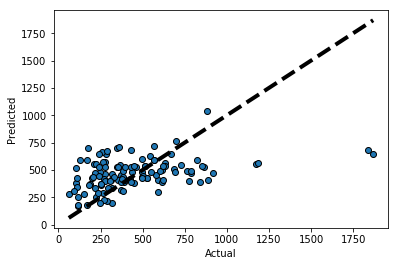

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.548485775012523 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.118940133254
TF-IDF Assault - non-domestic violence 0.109047221918
Morning_pcapita 0.0885210885473
instagrammers_ratio 0.0863875043082
Afternoon_pcapita 0.067633156082
Polr_Neg_N_ptweet 0.0592476884659
ja_tweeters 0.0557894530149
Evening_pcapita 0.0530098764538
replyers_per_capita 0.0528364877792
Night_pcapita 0.0512100994158
Polr_Neg_M_ptweet 0.0406995679603
link_tweets_ratio 0.0406065871352
tl_tweeters 0.0364798526338
in_tweeters 0.036035189185
Polr_Neg_E_ptweet 0.0326940132281
Prof_exists_pcapita 0.0297780625484
Polr_Neg_A_ptweet 0.0246393809946
Opal Assault - non-domestic violence 0.00870012347563
tr_tweeters 0.00774451360061
R2: 0.0968801045693
RMSE: 231.029385232
MAPE: 52.0751258236
Mean APE Baseline: 59.8326771602


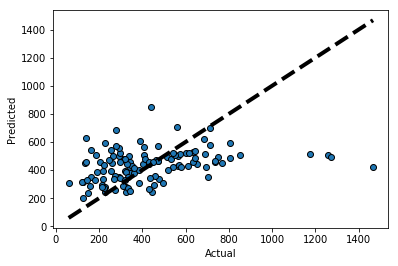

Fraud
Finished 10x10 fold cross validation in 1.6223502540960908 seconds
MOST IMPORTANT FEATURES:
TF-IDF Fraud 0.159788894267
total_tweeters 0.151463640474
ja_tweeters 0.14472237735
instagrammers_ratio 0.117582886133
Opal Fraud 0.0957679845688
replyers_per_capita 0.0394430987727
tl_tweeters 0.0352731305355
Polr_Neg_E_ptweet 0.0329867224668
tr_tweeters 0.0319388640186
Polr_Neg_A_ptweet 0.0290511840277
link_tweets_ratio 0.025956703014
in_tweeters 0.0245684267217
Polr_Neg_M_ptweet 0.0216333127642
Afternoon_pcapita 0.0196347136842
Prof_exists_pcapita 0.0177010502447
Polr_Neg_N_ptweet 0.0164945762764
Morning_pcapita 0.0129852448558
Evening_pcapita 0.0120615700404
Night_pcapita 0.0109456197846
R2: 0.251310587216
RMSE: 250.239173398
MAPE: 37.3636334213
Mean APE Baseline: 50.564378615


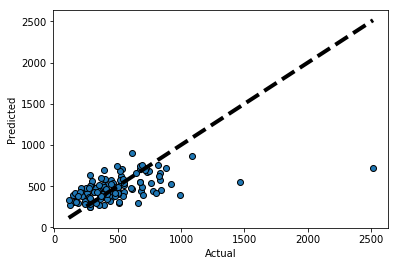

Sexual Offences
Finished 10x10 fold cross validation in 1.5667808768339455 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.219782968151
replyers_per_capita 0.105819331425
instagrammers_ratio 0.0987562096796
Night_pcapita 0.0698259969579
Polr_Neg_E_ptweet 0.0579657313717
Polr_Neg_N_ptweet 0.0572173401592
total_tweeters 0.0533749823519
Polr_Neg_M_ptweet 0.0456906260775
Prof_exists_pcapita 0.0421500104739
link_tweets_ratio 0.0400593868495
Evening_pcapita 0.0395183199255
Polr_Neg_A_ptweet 0.036449422219
Morning_pcapita 0.0344587471832
Afternoon_pcapita 0.0299026135161
tl_tweeters 0.0210478328124
in_tweeters 0.0154634514078
tr_tweeters 0.0119993263684
Opal Sexual Offences 0.0105234020197
ja_tweeters 0.0099943010511
R2: 0.30889348042
RMSE: 77.6055136992
MAPE: 38.192644139
Mean APE Baseline: 53.0821806583


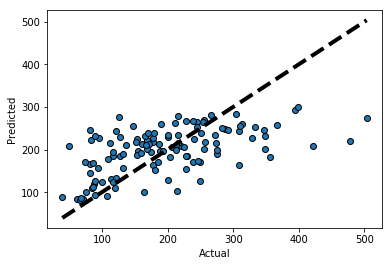

Malicious damage to property
Finished 10x10 fold cross validation in 1.521618781145662 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.159953760057
TF-IDF Malicious damage to property 0.105677415802
Polr_Neg_N_ptweet 0.103907755967
Morning_pcapita 0.0898424657017
replyers_per_capita 0.0625483129751
Night_pcapita 0.0562973208136
Afternoon_pcapita 0.0508385069743
Evening_pcapita 0.0483129496935
tl_tweeters 0.0472047149127
Polr_Neg_M_ptweet 0.044236682589
total_tweeters 0.0425577051563
Polr_Neg_E_ptweet 0.0391141354598
link_tweets_ratio 0.0381708534758
Prof_exists_pcapita 0.0339171206075
Polr_Neg_A_ptweet 0.0277978716047
Opal Malicious damage to property 0.0186566308692
in_tweeters 0.0180025825309
ja_tweeters 0.0066141292502
tr_tweeters 0.0063490855605
R2: 0.248915065633
RMSE: 496.476325896
MAPE: 43.302152153
Mean APE Baseline: 53.4238936165


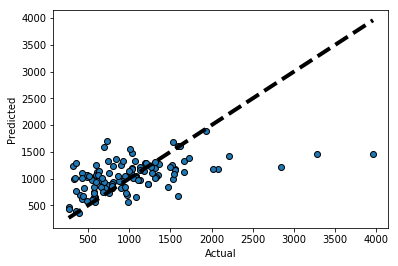

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.5701564708724618 seconds
MOST IMPORTANT FEATURES:
TF-IDF Prohibited weapons offences 0.223743813243
total_tweeters 0.181720374183
instagrammers_ratio 0.0885838242171
replyers_per_capita 0.0783979655589
tl_tweeters 0.0628541168468
Polr_Neg_A_ptweet 0.0432290936702
Opal Prohibited weapons offences 0.0420739854518
Polr_Neg_N_ptweet 0.0374343060357
Afternoon_pcapita 0.0314769894026
Prof_exists_pcapita 0.0296584152036
Night_pcapita 0.0285141335502
Polr_Neg_M_ptweet 0.0283290136755
Polr_Neg_E_ptweet 0.0282851246741
link_tweets_ratio 0.0265521548534
Evening_pcapita 0.0211840147563
Morning_pcapita 0.0155723992343
in_tweeters 0.0133185768515
ja_tweeters 0.0128414131706
tr_tweeters 0.00623028542153
R2: 0.39330014425
RMSE: 116.185167717
MAPE: 80.4453236754
Mean APE Baseline: 126.659859832


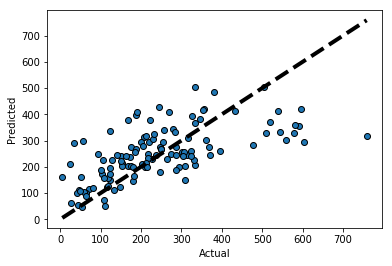

,LGA,Twitter18+Opal Assault - domestic violence,Twitter18+Opal Assault - non-domestic violence,Twitter18+Opal Fraud,Twitter18+Opal Sexual Offences,Twitter18+Opal Malicious damage to property,Twitter18+Opal Prohibited weapons offences
0,Albury,624.718040,501.646926,627.579919,234.147511,1194.891972,311.147031
1,Armidale Regional,434.785107,445.954952,452.923641,207.701457,1418.494613,274.165381
2,Ballina,374.302860,393.332996,438.442319,197.087593,816.989818,212.872137
3,Bathurst Regional,484.747262,472.355624,445.903236,229.984014,1144.954162,228.481886
4,Bayside,200.586835,257.893709,677.658790,110.349113,651.744980,75.039713
5,Bega Valley,406.598383,460.787524,430.011719,224.840282,937.814337,203.029818
6,Bellingen,576.669436,496.952157,463.091123,185.911567,1123.240956,249.255379
7,Berrigan,698.156685,629.193365,391.312129,246.342890,1587.664968,344.847978
8,Blacktown,412.617361,295.544269,751.595625,100.799605,572.794755,123.180085
9,Bland,703.831620,480.352024,252.733976,278.081380,1324.105351,485.763583


In [167]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime] + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Twitter18+Opal '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [168]:
output.to_csv("../../data/clean/ensemble_twitter18_opal_rfr_preds.csv",index=False)

In [169]:
# Append to mapes_df:
opal_19_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    opal_19_df[crime] = score_crime(all_features, targets, derived_features.tolist()+['TF-IDF','Opal'], crime,
                                n=10, random_state=None)
opal_19_df['Model'] = 'T18 + Opal'
mapes_df=mapes_df.append(opal_19_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


## Compare to Demographic Features before Ensembling

RFR 12 DEMOGRAPHIC FEATURES ONLY.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.4080042839050293 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.48140713012
Pop_density 0.111281927267
Per_immi 0.0693682499322
Median_mortgage_repay_monthly_G02 0.0546310978243
Num_sep_males 0.0486193883673
Per_no_relg 0.0415829584986
Per_Voc 0.0392920146668
Median_rent_weekly_G02 0.0384289879809
Median_tot_hhd_inc_weekly_G02 0.0381933565222
Percent_Unem_loyment_P_G40 0.0335073208204
Per_english 0.0228082970287
Median_age_persons_G02 0.0208792709714
R2: 0.546235712999
RMSE: 197.559641765
MAPE: 28.1110122856
Mean APE Baseline: 72.0914035637


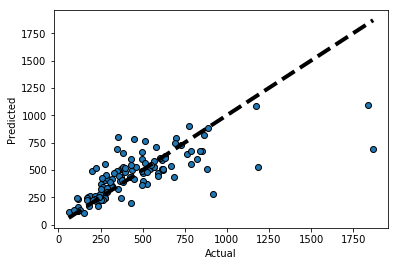

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.3940481031313539 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.404990666632
Pop_density 0.158316333699
Percent_Unem_loyment_P_G40 0.0794038142528
Median_rent_weekly_G02 0.076261021541
Per_no_relg 0.0699790539566
Median_mortgage_repay_monthly_G02 0.0531245177909
Per_Voc 0.0369083161097
Num_sep_males 0.0301651658548
Per_immi 0.0251223484056
Median_tot_hhd_inc_weekly_G02 0.0222968876974
Median_age_persons_G02 0.0218875326078
Per_english 0.0215443414524
R2: 0.486887991725
RMSE: 174.140828694
MAPE: 29.5482961525
Mean APE Baseline: 59.8326771602


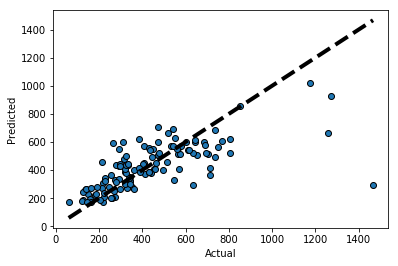

Fraud
Finished 10x10 fold cross validation in 1.4138124356977642 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.233315837082
Pop_density 0.222701992344
Per_lone_par 0.174219335277
Per_english 0.0988594068924
Per_no_relg 0.0665184506772
Percent_Unem_loyment_P_G40 0.0490043684144
Num_sep_males 0.0377068808095
Per_immi 0.0350202236418
Median_rent_weekly_G02 0.0240116284801
Per_Voc 0.023519604882
Median_tot_hhd_inc_weekly_G02 0.0223053650122
Median_mortgage_repay_monthly_G02 0.0128169064866
R2: 0.412784531314
RMSE: 221.617062775
MAPE: 30.3398987989
Mean APE Baseline: 50.564378615


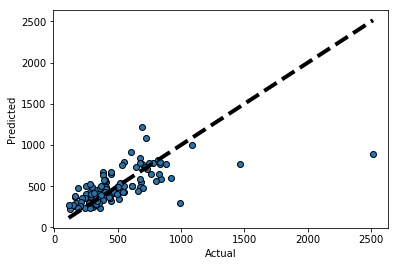

Sexual Offences
Finished 10x10 fold cross validation in 1.3784076650626957 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.378389415352
Median_mortgage_repay_monthly_G02 0.122577525137
Num_sep_males 0.107947584571
Median_rent_weekly_G02 0.105110848988
Per_english 0.0442875301758
Per_immi 0.0440784550857
Pop_density 0.0384374335299
Per_no_relg 0.0374158782721
Per_Voc 0.0323163068096
Median_tot_hhd_inc_weekly_G02 0.0318563244672
Median_age_persons_G02 0.0288251141569
Percent_Unem_loyment_P_G40 0.0287575834537
R2: 0.492378136296
RMSE: 66.5105045908
MAPE: 27.4960812381
Mean APE Baseline: 53.0821806583


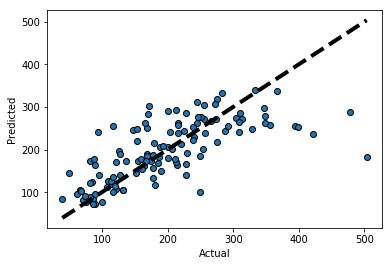

Malicious damage to property
Finished 10x10 fold cross validation in 1.399072180967778 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.465267231676
Pop_density 0.115404827102
Median_rent_weekly_G02 0.0871871383501
Median_mortgage_repay_monthly_G02 0.0564611873591
Per_immi 0.0410780415974
Num_sep_males 0.039709671824
Per_english 0.0363532917298
Median_age_persons_G02 0.0356156705672
Percent_Unem_loyment_P_G40 0.0348237961375
Per_Voc 0.0341135108046
Per_no_relg 0.0335411153197
Median_tot_hhd_inc_weekly_G02 0.0204445175326
R2: 0.533268872406
RMSE: 391.369882609
MAPE: 26.1931087934
Mean APE Baseline: 53.4238936165


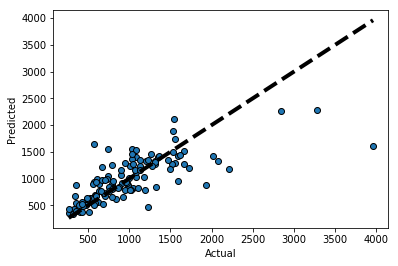

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.3555610398761928 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.361603978713
Pop_density 0.143914097676
Per_Voc 0.0917027680825
Per_english 0.0849454380892
Num_sep_males 0.0828143465658
Median_mortgage_repay_monthly_G02 0.0440041340808
Per_immi 0.0435226694054
Median_age_persons_G02 0.0408304225962
Per_lone_par 0.0344242366197
Median_tot_hhd_inc_weekly_G02 0.0316298170851
Percent_Unem_loyment_P_G40 0.0216860531141
Per_no_relg 0.0189220379722
R2: 0.579153559382
RMSE: 96.7666202087
MAPE: 38.0227932936
Mean APE Baseline: 126.659859832


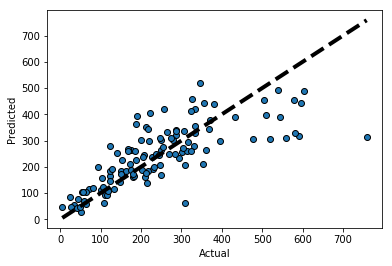

,LGA,Demog Assault - domestic violence,Demog Assault - non-domestic violence,Demog Fraud,Demog Sexual Offences,Demog Malicious damage to property,Demog Prohibited weapons offences
0,Albury,507.507758,560.871935,482.211216,239.320020,1322.419533,293.533925
1,Armidale Regional,475.600738,510.416623,587.230474,212.405353,1172.083131,319.869710
2,Ballina,373.051906,383.980975,506.660829,173.788384,903.939738,175.356858
3,Bathurst Regional,499.309642,453.589350,550.302072,206.158966,1027.503422,237.658453
4,Bayside,351.343739,330.605339,713.934960,122.748395,701.223226,114.453799
5,Bega Valley,364.933806,323.871440,326.003945,220.130656,830.092896,224.091917
6,Bellingen,411.662560,591.123292,499.242619,255.676978,999.434313,198.117783
7,Berrigan,251.699361,266.601170,365.730349,172.876657,710.996978,302.728329
8,Blacktown,468.692615,405.198140,818.254981,162.456859,879.437817,143.848681
9,Bland,687.970510,481.338036,324.363824,262.464065,1550.841139,438.070224


In [170]:
output = pd.DataFrame()
print('RFR 12 DEMOGRAPHIC FEATURES ONLY.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist()
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Demog '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [171]:
output.to_csv("../../data/clean/demographics_rfr_preds.csv",index=False)

In [172]:
# Append to mapes_df
dem_12_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    dem_12_df[crime] = score_crime(all_features, targets, demog_features.tolist(), crime,
                                n=10, random_state=None)
dem_12_df['Model'] = 'Demographic 12'
mapes_df=mapes_df.append(dem_12_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


Combine all derived features, demographic features, and tf-idf prediction into an ensamble model.

RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS OPAL PLUS 12 DEMOGRAPHIC FEATURES.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.8752653887495399 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.456611314483
Pop_density 0.0941228965377
Median_mortgage_repay_monthly_G02 0.0498073952814
Per_immi 0.0494547559524
Polr_Neg_N_ptweet 0.0346013810543
Num_sep_males 0.0337347231961
TF-IDF Assault - domestic violence 0.032251204034
Median_tot_hhd_inc_weekly_G02 0.0274182534985
Median_rent_weekly_G02 0.025778791902
Per_Voc 0.0218880646737
Percent_Unem_loyment_P_G40 0.0187826709356
Per_no_relg 0.0182296633091
instagrammers_ratio 0.0129257888994
Per_english 0.0121227881936
link_tweets_ratio 0.0117193922578
Polr_Neg_A_ptweet 0.0102773800083
Polr_Neg_M_ptweet 0.0101006748781
replyers_per_capita 0.00989054537892
total_tweeters 0.00817858551907
Prof_exists_pcapita 0.00814423017596
R2: 0.539610649658
RMSE: 198.996623892
MAPE: 29.3715147039
Mean APE Baseline: 72.0914035637


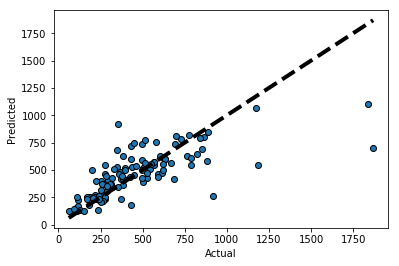

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.8538672178983688 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.357870818748
Pop_density 0.119180194255
Percent_Unem_loyment_P_G40 0.0703903812494
Median_rent_weekly_G02 0.0570148414661
Median_mortgage_repay_monthly_G02 0.0466839661501
Per_no_relg 0.039734959231
total_tweeters 0.038144234135
Afternoon_pcapita 0.0234275837525
ja_tweeters 0.0223795526747
Per_Voc 0.0204109046633
Num_sep_males 0.0184345985898
Per_immi 0.016030108815
tl_tweeters 0.0132498895788
instagrammers_ratio 0.0118574893659
TF-IDF Assault - non-domestic violence 0.0115365586754
Morning_pcapita 0.0114162354793
Night_pcapita 0.0113348958535
replyers_per_capita 0.0110657065387
Median_tot_hhd_inc_weekly_G02 0.011016077544
Per_english 0.0102295920472
R2: 0.47776138958
RMSE: 175.682703575
MAPE: 30.2947000698
Mean APE Baseline: 59.8326771602


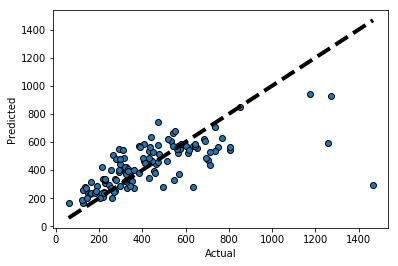

Fraud
Finished 10x10 fold cross validation in 2.0674640028737485 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.201002266634
Pop_density 0.148546547452
Per_lone_par 0.109844098692
Per_english 0.0771917524265
total_tweeters 0.0624302381162
TF-IDF Fraud 0.0588598360922
ja_tweeters 0.0507119172348
Percent_Unem_loyment_P_G40 0.0317345364857
Per_no_relg 0.0315237374273
tl_tweeters 0.0208424059768
Polr_Neg_E_ptweet 0.0204134078218
Polr_Neg_A_ptweet 0.0159955654595
replyers_per_capita 0.0158474288287
Per_immi 0.01537837685
Num_sep_males 0.0150387364038
tr_tweeters 0.0147569216539
instagrammers_ratio 0.0111812850631
Median_rent_weekly_G02 0.0101804442607
Polr_Neg_M_ptweet 0.0101499420246
in_tweeters 0.00938103804961
R2: 0.390680340826
RMSE: 225.749629456
MAPE: 29.6170642858
Mean APE Baseline: 50.564378615


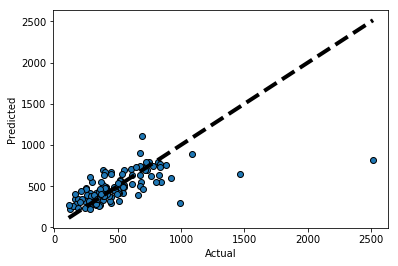

Sexual Offences
Finished 10x10 fold cross validation in 1.7893914440646768 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.341510420825
Median_mortgage_repay_monthly_G02 0.104948620233
Median_rent_weekly_G02 0.0921304183532
Num_sep_males 0.0832967927645
Per_immi 0.0294156677899
Polr_Neg_N_ptweet 0.0257091288661
Polr_Neg_M_ptweet 0.025115394585
Per_english 0.0248982324722
Pop_density 0.0198466192091
link_tweets_ratio 0.0192290039992
Median_tot_hhd_inc_weekly_G02 0.0184869579038
Per_no_relg 0.0184006746554
Per_Voc 0.0163412734912
Percent_Unem_loyment_P_G40 0.0161293412906
Polr_Neg_E_ptweet 0.0156366561801
Median_age_persons_G02 0.0155686817083
Polr_Neg_A_ptweet 0.0149190190275
instagrammers_ratio 0.0145277078106
replyers_per_capita 0.0142345116911
Night_pcapita 0.0132026983905
R2: 0.502100667782
RMSE: 65.8704840621
MAPE: 27.4190667564
Mean APE Baseline: 53.0821806583


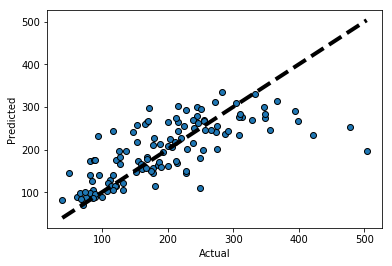

Malicious damage to property
Finished 10x10 fold cross validation in 1.8459089999087155 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.446892550186
Pop_density 0.098986486303
Median_rent_weekly_G02 0.0745200002667
Median_mortgage_repay_monthly_G02 0.0532768419691
Num_sep_males 0.025321180933
Per_immi 0.0253054540368
Percent_Unem_loyment_P_G40 0.0231285507195
Median_age_persons_G02 0.020552661115
Per_english 0.020163384831
Per_Voc 0.0175381409181
Per_no_relg 0.0166914647888
instagrammers_ratio 0.0166552783205
replyers_per_capita 0.0134645106254
Polr_Neg_N_ptweet 0.0133175782982
Afternoon_pcapita 0.0130617622169
total_tweeters 0.0120852401897
Polr_Neg_M_ptweet 0.0118029114709
Median_tot_hhd_inc_weekly_G02 0.010510931369
Polr_Neg_E_ptweet 0.0103834197603
link_tweets_ratio 0.0103319699027
R2: 0.526214085004
RMSE: 394.316628398
MAPE: 27.6972838961
Mean APE Baseline: 53.4238936165


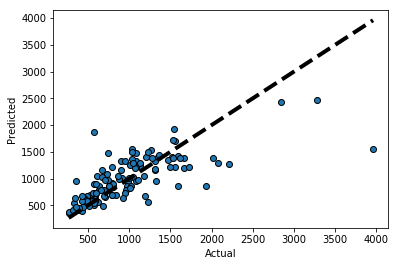

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.8267510361038148 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.343649754914
Pop_density 0.120046877343
Num_sep_males 0.0652455962465
Per_Voc 0.0648119577876
Per_english 0.0646399725521
instagrammers_ratio 0.0333205496742
Median_mortgage_repay_monthly_G02 0.0325669502048
Per_immi 0.0265808145912
Median_age_persons_G02 0.0250724143002
total_tweeters 0.0226079695796
Per_lone_par 0.0195738813277
Median_tot_hhd_inc_weekly_G02 0.0182152989111
Night_pcapita 0.0131035250737
tl_tweeters 0.0124996351335
Polr_Neg_N_ptweet 0.0119176482168
Percent_Unem_loyment_P_G40 0.0118324310923
Prof_exists_pcapita 0.0114732959613
Polr_Neg_E_ptweet 0.00978895312616
Per_no_relg 0.00933755669239
Polr_Neg_M_ptweet 0.00875371805967
R2: 0.553607075087
RMSE: 99.6603469432
MAPE: 41.2351252602
Mean APE Baseline: 126.659859832


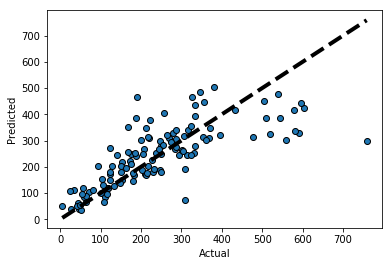

,LGA,ENSEMBLE31 Assault - domestic violence,ENSEMBLE31 Assault - non-domestic violence,ENSEMBLE31 Fraud,ENSEMBLE31 Sexual Offences,ENSEMBLE31 Malicious damage to property,ENSEMBLE31 Prohibited weapons offences
0,Albury,505.645934,571.490493,551.007526,264.833466,1321.973516,341.415010
1,Armidale Regional,522.081718,559.829064,553.826868,227.193720,1270.067282,305.270275
2,Ballina,402.576694,396.244389,467.260458,173.942344,911.010177,149.760486
3,Bathurst Regional,528.824804,445.524203,547.270512,208.723064,1052.173703,224.062896
4,Bayside,342.509931,334.157723,697.569108,127.114437,680.838205,107.928020
5,Bega Valley,370.233655,349.203218,370.771150,218.729941,842.332263,218.948958
6,Bellingen,464.913447,507.065014,476.309102,242.864493,1056.364712,202.505836
7,Berrigan,253.751449,265.576636,339.103226,174.338639,793.376684,327.445909
8,Blacktown,464.538460,393.553898,791.271797,160.513947,942.115214,137.743379
9,Bland,686.257666,488.237633,278.285206,301.491656,1481.508874,502.344128


In [173]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS OPAL PLUS 12 DEMOGRAPHIC FEATURES.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist() + derived_features.tolist() + ['TF-IDF '+crime, 'Opal '+crime]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'ENSEMBLE31 '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [174]:
output.to_csv("../../data/clean/ensemble_31_features_rfr_preds.csv",index=False)

In [175]:
# Append to mapes_df
all_31_df = pd.DataFrame()
flist = demog_features.tolist() + derived_features.tolist() + ['TF-IDF', 'Opal']
np.random.seed(2018)
for crime in crimes:
    all_31_df[crime] = score_crime(all_features, targets, flist, crime,
                                n=10, random_state=None)
all_31_df['Model'] = 'All 31'
mapes_df=mapes_df.append(all_31_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


In [176]:
#We need a baseline as well to compare
baseline_df = pd.DataFrame(columns=crimes)
for n in np.arange(10):
    baseline_df.loc[n] = np.zeros(len(crimes))
    for crime in crimes:
        baseline_df.loc[n][crime] = mape(targets[crime],np.mean(targets[crime]))
baseline_df['Model'] = 'Mean Baseline'
mapes_df=mapes_df.append(baseline_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


Ensembling improves 2 crimes and makes 4 worse on MAPE, although there is very little difference on most crimes. Starting with demographics, try forward feature selection, keeping track of mean MAPE across all 6 crimes.

In [61]:
np.random.seed(2018)
demog_mmape = mmape_score(all_features, targets, demog_features.tolist())
print('Mean MAPE score for 12 demographic features',demog_mmape)
# Append a pseudo-feature for TF-IDF score. Ugly but necessary.
remaining = demog_features.tolist() + derived_features.tolist() + ['TF-IDF','Opal']
selected = []
mmapes = []
while len(remaining) > 0:
    start = timer()
    min_score = 1e+10
    for feat in remaining:
        fscore, sigma = mmape_score(all_features, targets, selected + [feat])
        if fscore < min_score:
            min_score = fscore
            best_sigma = sigma
            best_feat = feat
    remaining.remove(best_feat)
    selected.append(best_feat)
    mmapes.append((min_score, best_sigma))
    end = timer()
    print('Selected', best_feat, 'with MMAPE', mmapes[-1], 'in', end-start,'seconds.')

Mean MAPE score for 12 demographic features (31.734470346754932, 0.25391775765697888)
Selected Pop_density with MMAPE (47.374957729155717, 0.41962397777748622) in 80.601124339737 seconds.
Selected Per_lone_par with MMAPE (33.879886904245637, 0.48377988075286277) in 82.55920999217778 seconds.
Selected instagrammers_ratio with MMAPE (32.43943721234259, 0.34631058832814515) in 79.86044238274917 seconds.
Selected Median_age_persons_G02 with MMAPE (32.053107809028191, 0.60292360359551456) in 78.89737399667501 seconds.
Selected Per_Voc with MMAPE (31.354109670057476, 0.3581113593802292) in 77.54662905912846 seconds.
Selected Median_rent_weekly_G02 with MMAPE (31.400955630551852, 0.33559413491038331) in 75.64885575929657 seconds.
Selected replyers_per_capita with MMAPE (31.058050146632315, 0.4448490166600147) in 74.59205287275836 seconds.
Selected Median_mortgage_repay_monthly_G02 with MMAPE (31.074220508337703, 0.1895464664221998) in 72.54969002772123 seconds.
Selected tr_tweeters with MMAPE

In [62]:
print(selected)
scores, sigmas = zip(*mmapes)
print(mmapes)

['Pop_density', 'Per_lone_par', 'instagrammers_ratio', 'Median_age_persons_G02', 'Per_Voc', 'Median_rent_weekly_G02', 'replyers_per_capita', 'Median_mortgage_repay_monthly_G02', 'tr_tweeters', 'ja_tweeters', 'Per_english', 'Median_tot_hhd_inc_weekly_G02', 'Night_pcapita', 'Polr_Neg_M_ptweet', 'link_tweets_ratio', 'Percent_Unem_loyment_P_G40', 'Evening_pcapita', 'Num_sep_males', 'in_tweeters', 'Afternoon_pcapita', 'Prof_exists_pcapita', 'Per_no_relg', 'TF-IDF', 'Polr_Neg_N_ptweet', 'Polr_Neg_E_ptweet', 'Per_immi', 'tl_tweeters', 'total_tweeters', 'Opal', 'Polr_Neg_A_ptweet', 'Morning_pcapita']
[(47.374957729155717, 0.41962397777748622), (33.879886904245637, 0.48377988075286277), (32.43943721234259, 0.34631058832814515), (32.053107809028191, 0.60292360359551456), (31.354109670057476, 0.3581113593802292), (31.400955630551852, 0.33559413491038331), (31.058050146632315, 0.4448490166600147), (31.074220508337703, 0.1895464664221998), (30.87779840250257, 0.58275410314164555), (30.6635603225713

['Pop_density', 'Per_lone_par', 'instagrammers_ratio', 'Median_age_persons_G02', 'Per_Voc', 'Median_rent_weekly_G02', 'replyers_per_capita', 'Median_mortgage_repay_monthly_G02', 'tr_tweeters', 'ja_tweeters', 'Per_english', 'Median_tot_hhd_inc_weekly_G02', 'Night_pcapita']
RFR OPTIMISED ENSEMBLE : BEST 13 FEATURES.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.420670468825847 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.518571235725
Pop_density 0.125007867968
Median_mortgage_repay_monthly_G02 0.0754698952215
Median_rent_weekly_G02 0.0564407633457
Median_tot_hhd_inc_weekly_G02 0.0474673016582
Per_Voc 0.0411841798102
replyers_per_capita 0.0298486597065
instagrammers_ratio 0.0275947041548
Per_english 0.0243635469177
Median_age_persons_G02 0.0231686581123
Night_pcapita 0.0212136486045
tr_tweeters 0.00614444282846
ja_tweeters 0.003525095947
R2: 0.558469044368
RMSE: 194.878376304
MAPE: 29.9196763783
Mean APE Baseline: 72.0914035637


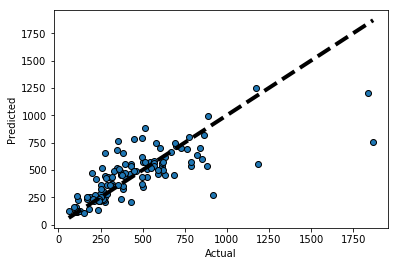

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.3913661111146212 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.445941487855
Pop_density 0.179608982409
Median_rent_weekly_G02 0.0669558399323
Median_mortgage_repay_monthly_G02 0.0509584733001
ja_tweeters 0.042424670055
Night_pcapita 0.0393649792035
Per_Voc 0.0388783228983
replyers_per_capita 0.0266821427484
instagrammers_ratio 0.0247535506781
tr_tweeters 0.024144134917
Per_english 0.0216385162238
Median_age_persons_G02 0.0214082547571
Median_tot_hhd_inc_weekly_G02 0.0172406450224
R2: 0.531740586048
RMSE: 166.355734518
MAPE: 29.1779714761
Mean APE Baseline: 59.8326771602


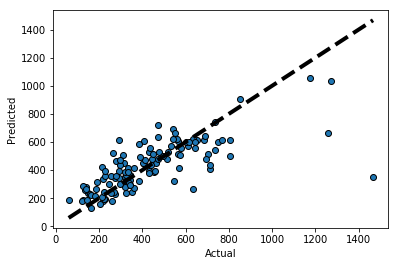

Fraud
Finished 10x10 fold cross validation in 1.4269893211312592 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.233826409433
Pop_density 0.219234189832
Per_lone_par 0.166318065286
Per_english 0.106387472724
ja_tweeters 0.0874277574054
replyers_per_capita 0.0329681844299
tr_tweeters 0.0317373486538
Median_rent_weekly_G02 0.0285319235161
Median_tot_hhd_inc_weekly_G02 0.0243542169439
Per_Voc 0.0233639579984
instagrammers_ratio 0.0181005004062
Night_pcapita 0.0166342881727
Median_mortgage_repay_monthly_G02 0.0111156851988
R2: 0.425495106884
RMSE: 219.205434493
MAPE: 30.8455613141
Mean APE Baseline: 50.564378615


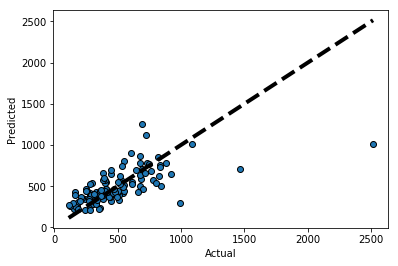

Sexual Offences
Finished 10x10 fold cross validation in 1.4411257486790419 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.412354586469
Median_mortgage_repay_monthly_G02 0.147583104186
Median_rent_weekly_G02 0.135518341457
Night_pcapita 0.0471003204927
Per_english 0.0447602182697
Pop_density 0.0410594453781
Median_tot_hhd_inc_weekly_G02 0.037385173308
replyers_per_capita 0.0324023718929
instagrammers_ratio 0.0316731819055
Median_age_persons_G02 0.0270402262831
Per_Voc 0.0269248551006
tr_tweeters 0.00832107990994
ja_tweeters 0.00787709534696
R2: 0.528040804557
RMSE: 64.1316345501
MAPE: 26.1030832511
Mean APE Baseline: 53.0821806583


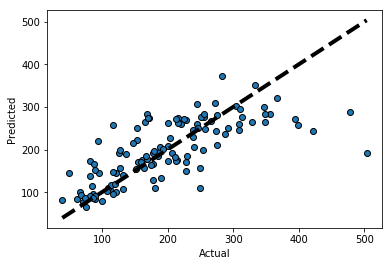

Malicious damage to property
Finished 10x10 fold cross validation in 1.454872909002006 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.482143742411
Pop_density 0.121971384902
Median_rent_weekly_G02 0.100864761459
Median_mortgage_repay_monthly_G02 0.0673927177603
Median_age_persons_G02 0.0381920273681
Per_english 0.0350592154278
instagrammers_ratio 0.0330999696539
Per_Voc 0.0318267445215
replyers_per_capita 0.0305879765875
Night_pcapita 0.0249960758269
Median_tot_hhd_inc_weekly_G02 0.0213884709803
tr_tweeters 0.00783721936167
ja_tweeters 0.00463969374056
R2: 0.588790931293
RMSE: 367.35449719
MAPE: 25.3360910142
Mean APE Baseline: 53.4238936165


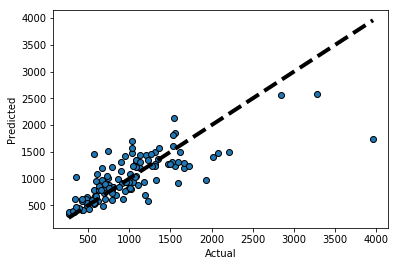

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.5087735787965357 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.394004008208
Pop_density 0.142088510809
Per_Voc 0.0907902975653
Per_english 0.0820604503147
Median_mortgage_repay_monthly_G02 0.0551668537322
instagrammers_ratio 0.0506746373905
Per_lone_par 0.043312388525
Median_age_persons_G02 0.0392644975108
Night_pcapita 0.0373555528294
Median_tot_hhd_inc_weekly_G02 0.0335559126306
replyers_per_capita 0.0209613344697
ja_tweeters 0.006636495111
tr_tweeters 0.0041290609034
R2: 0.609746704523
RMSE: 93.1830739475
MAPE: 35.7329523033
Mean APE Baseline: 126.659859832


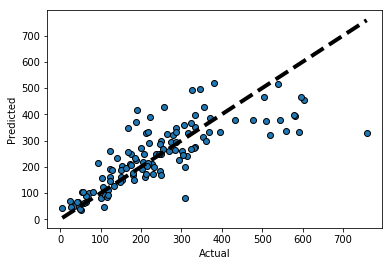

,LGA,BEST 13 Assault - domestic violence,BEST 13 Assault - non-domestic violence,BEST 13 Fraud,BEST 13 Sexual Offences,BEST 13 Malicious damage to property,BEST 13 Prohibited weapons offences
0,Albury,577.254253,608.566180,571.773190,263.920259,1493.217885,328.349038
1,Armidale Regional,576.814446,615.328677,497.956844,259.245783,1495.024957,346.138154
2,Ballina,364.081753,354.008232,419.859829,170.870119,784.676769,150.297917
3,Bathurst Regional,473.735632,447.923269,585.032108,208.651361,934.918856,209.882678
4,Bayside,369.103788,344.127269,784.300305,113.811873,671.770098,110.353288
5,Bega Valley,427.534633,329.042526,344.302782,222.900849,835.319482,204.540645
6,Bellingen,444.694993,522.661875,470.067696,258.354739,1087.937163,215.851209
7,Berrigan,250.946686,279.636045,430.119706,172.319114,783.135434,319.434551
8,Blacktown,460.851044,389.614687,856.615163,156.264042,802.974882,143.285114
9,Bland,683.813357,451.081801,255.866661,272.968933,1510.215427,518.882599


In [178]:
best = selected[:13]
print(best)
output = pd.DataFrame()
print('RFR OPTIMISED ENSEMBLE : BEST 13 FEATURES.')
np.random.seed(2018)
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in best]
    X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'BEST 13 '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [179]:
output.to_csv("../../data/clean/ensemble_best_13_rfr_preds.csv",index=False)

In [180]:
# Append to mapes_df
best_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    best_df[crime] = score_crime(all_features, targets, best, crime,
                                n=10, random_state=None)
best_df['Model'] = 'Best 13'
mapes_df=mapes_df.append(best_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


In [181]:
mapes_df.to_csv("../../data/clean/mapes_for_all_models.csv",index=False)

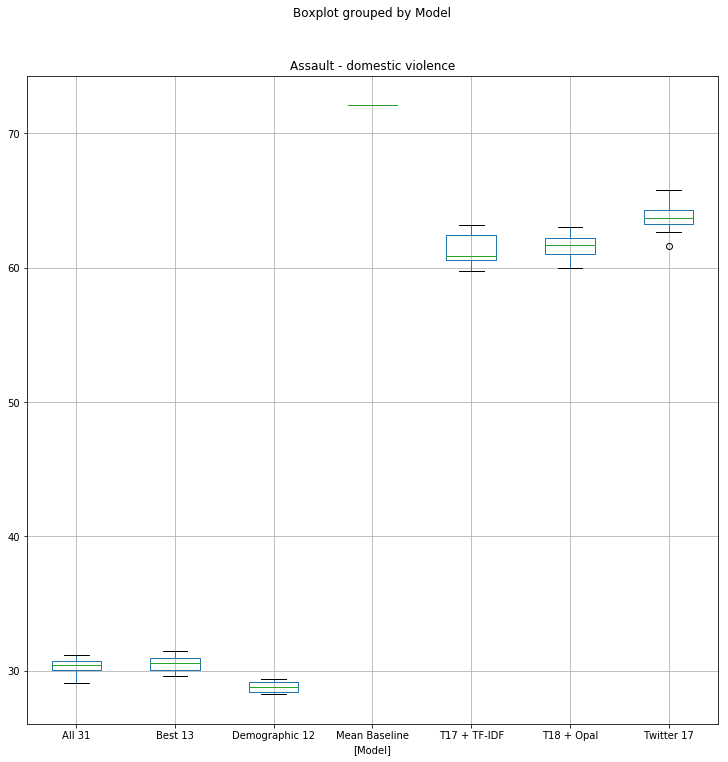

In [182]:
mapes_df[[mapes_df.columns[0],'Model']].boxplot(by='Model', figsize=(12,12))

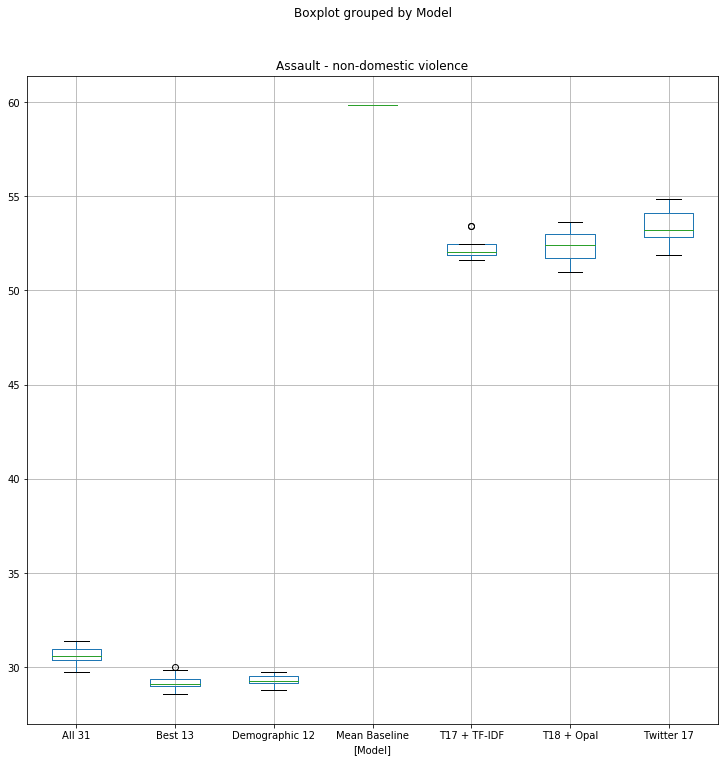

In [184]:
mapes_df[[mapes_df.columns[1],'Model']].boxplot(by='Model', figsize=(12,12))

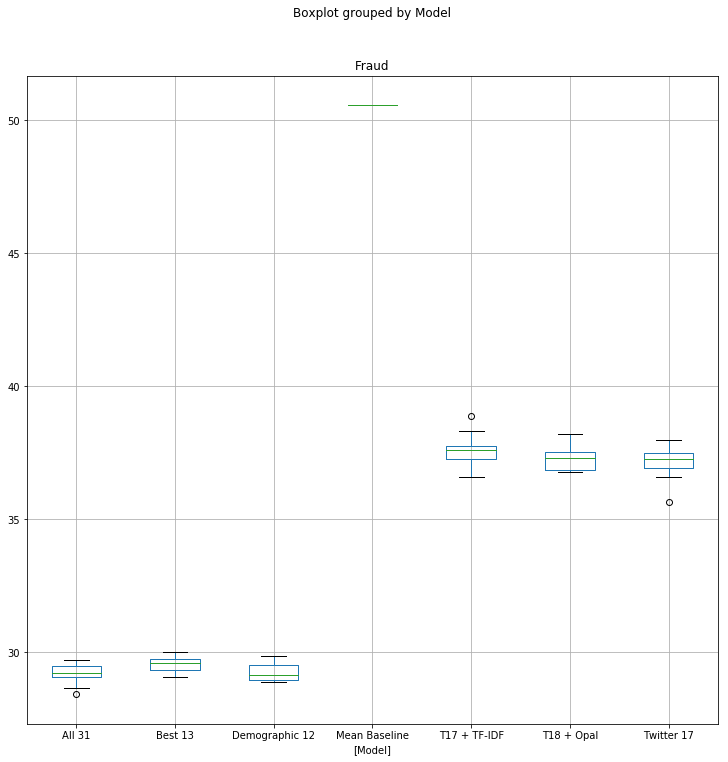

In [185]:
mapes_df[[mapes_df.columns[2],'Model']].boxplot(by='Model', figsize=(12,12))

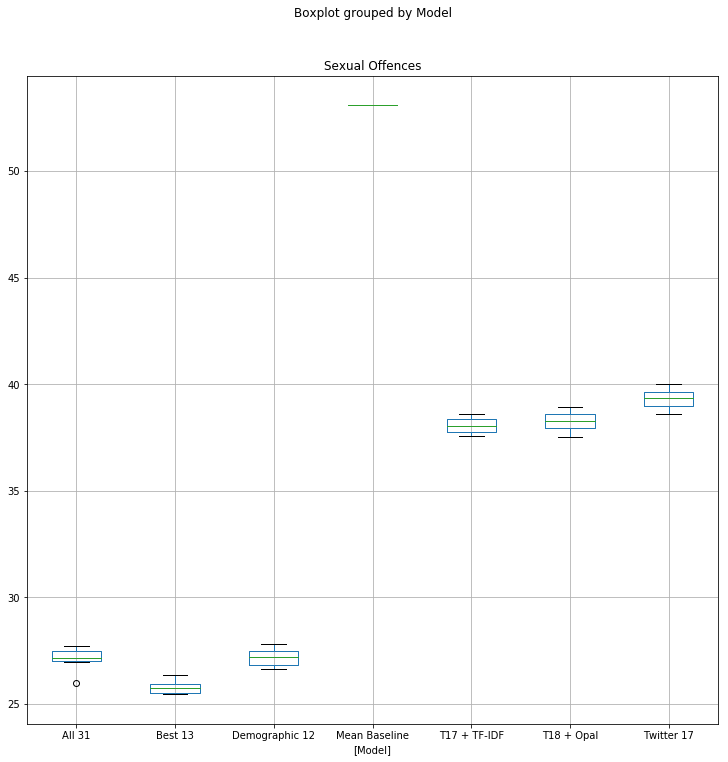

In [186]:
mapes_df[[mapes_df.columns[3],'Model']].boxplot(by='Model', figsize=(12,12))

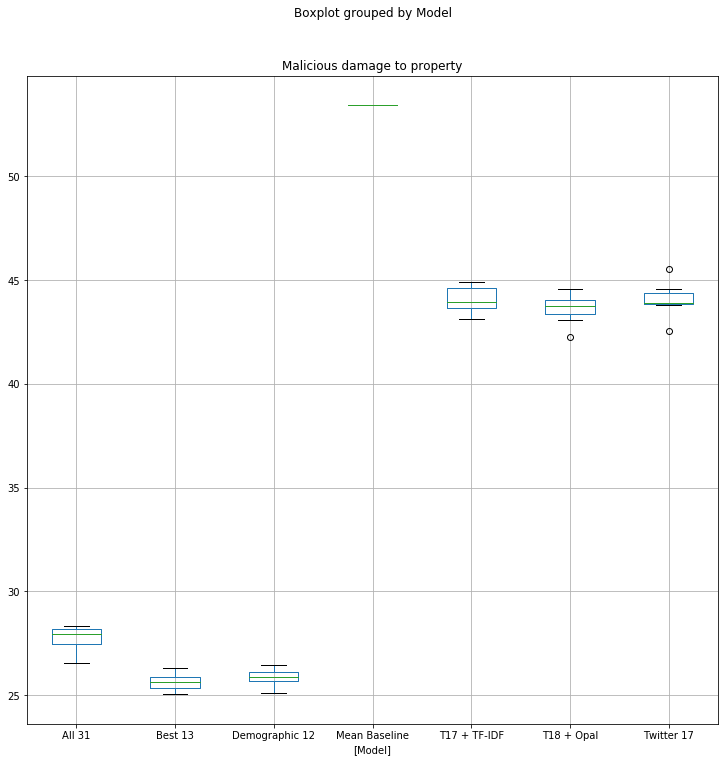

In [187]:
mapes_df[[mapes_df.columns[4],'Model']].boxplot(by='Model', figsize=(12,12))

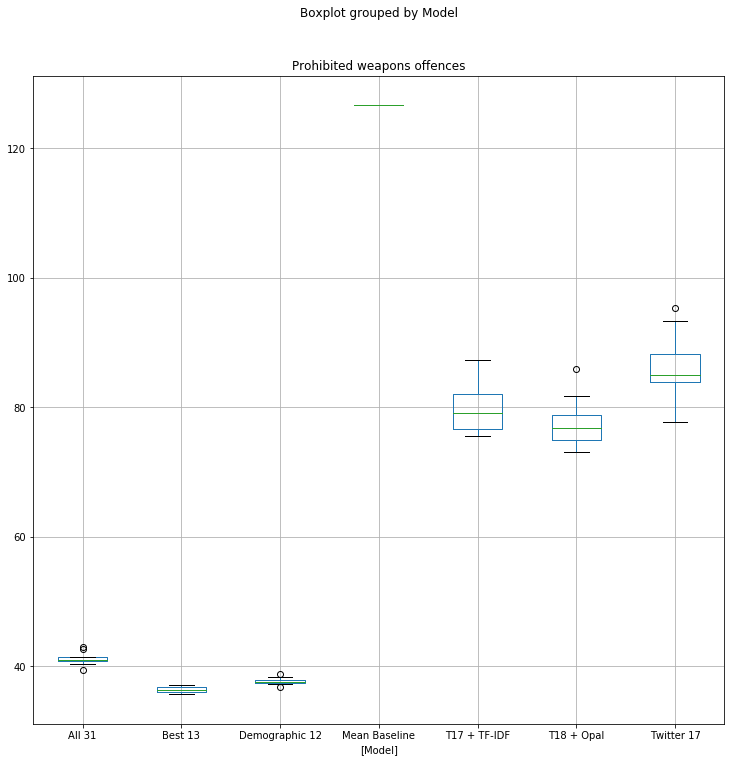

In [188]:
mapes_df[[mapes_df.columns[5],'Model']].boxplot(by='Model', figsize=(12,12))

In [189]:
print('RFR BEST CRIME SCORES')
np.random.seed(2018)
best_crime_scores = {}
for crime in crimes:
    scores = score_crime(all_features, targets, best, crime, n=10)
    best_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR BEST CRIME SCORES
Assault - domestic violence MEAN: 30.6164771738 STD DEV: 0.527896940311
Assault - non-domestic violence MEAN: 28.876492467 STD DEV: 0.280559053036
Fraud MEAN: 29.845804196 STD DEV: 0.601969197122
Sexual Offences MEAN: 25.8324922179 STD DEV: 0.345914635458
Malicious damage to property MEAN: 25.6479021604 STD DEV: 0.493318733182
Prohibited weapons offences MEAN: 36.6950897832 STD DEV: 0.426106833495


In [190]:
print('RFR 12 DEMOGRAPHIC')
np.random.seed(2018)
dem12_crime_scores = {}
for crime in crimes:
    scores = score_crime(all_features, targets, demog_features.tolist(), crime, n=10)
    dem12_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR 12 DEMOGRAPHIC
Assault - domestic violence MEAN: 29.0353879659 STD DEV: 0.383354054158
Assault - non-domestic violence MEAN: 29.2077176559 STD DEV: 0.520348384128
Fraud MEAN: 29.549267258 STD DEV: 0.494501930915
Sexual Offences MEAN: 27.4143621186 STD DEV: 0.439691090599
Malicious damage to property MEAN: 25.9648137686 STD DEV: 0.52800865198
Prohibited weapons offences MEAN: 37.8172180132 STD DEV: 0.494041880977


In [191]:
#unpaired t test
from scipy import stats
for crime in crimes:
    tstat,p = stats.ttest_ind(dem12_crime_scores[crime], best_crime_scores[crime])
    print("T statistic:",tstat,"P value:",p)

T statistic: -7.27040664333 P value: 9.3044187519e-07
T statistic: 1.68087741932 P value: 0.110056547837
T statistic: -1.14193613573 P value: 0.268444429648
T statistic: 8.48262216895 P value: 1.05365736769e-07
T statistic: 1.3157066018 P value: 0.204784919806
T statistic: 5.15988798856 P value: 6.57680806191e-05


In [192]:
for crime in crimes:
    print('\n',crime)
    tstat, p, moe = crime_ci(crime, dem12_crime_scores[crime], best_crime_scores[crime])
    diff = np.mean(dem12_crime_scores[crime]) - np.mean( best_crime_scores[crime])
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:7.6f}'.format(tstat,p))
    print ('The difference between groups is {:4.3f} [{:4.3f} to {:4.3f}] (mean [95% CI])'.format(diff, diff - moe, diff + moe))


 Assault - domestic violence
The results of the independent t-test are: 
	t-value = -7.270
	p-value = 0.000001
The difference between groups is -1.581 [-2.015 to -1.148] (mean [95% CI])

 Assault - non-domestic violence
The results of the independent t-test are: 
	t-value = 1.681
	p-value = 0.110057
The difference between groups is 0.331 [-0.062 to 0.724] (mean [95% CI])

 Fraud
The results of the independent t-test are: 
	t-value = -1.142
	p-value = 0.268444
The difference between groups is -0.297 [-0.814 to 0.221] (mean [95% CI])

 Sexual Offences
The results of the independent t-test are: 
	t-value = 8.483
	p-value = 0.000000
The difference between groups is 1.582 [1.210 to 1.954] (mean [95% CI])

 Malicious damage to property
The results of the independent t-test are: 
	t-value = 1.316
	p-value = 0.204785
The difference between groups is 0.317 [-0.163 to 0.797] (mean [95% CI])

 Prohibited weapons offences
The results of the independent t-test are: 
	t-value = 5.160
	p-value = 0.0